In [2]:
import randomwalk as rw
import numpy as np
import matplotlib.pyplot as plt

# CW10 : Monte Carlo Techniques

The word "Monte Carlo" is a fancy term for what essentially means "using random numbers." Since computers are good at generating (pseudo)random numbers quickly, it can be advantageous to use this randomness for simulations. In this notebook, you will explore a few interesting examples of this idea.

## Estimating $\pi$
As a simple example, consider the following technique for computing the number $\pi$:
  - Area of a unit circle : $\pi$
  - Area of a the minimum box that fits the unit circle, with side length 2 : $4$
  - Fraction of area of the box taken up by the unit circle: $\pi/4$
  - Therefore: If one finds the fraction of random points that uniformly cover such a box that fall inside the unit circle, then multiplying this fraction by 4 will yield $\pi$.

Let's test this idea:

In [3]:
def estimate_pi(N=100000):
    # Generate N random x and y coordinates within the box with sides from [-2,2]
    xs = np.random.uniform(-1,1,N)
    ys = np.random.uniform(-1,1,N)
    # Count how many points lie within the unit circle
    circle = np.where(xs**2 + ys**2 < 1, 1, 0).sum()
    # Compute pi
    return 4 * circle / N

In [4]:
for N in [10, 100, 1000, 10000, 100000, 1000000, 10000000]:
    print("N=",N, " : pi=", estimate_pi(N))

N= 10  : pi= 4.0
N= 100  : pi= 3.04
N= 1000  : pi= 3.18
N= 10000  : pi= 3.1312
N= 100000  : pi= 3.13692
N= 1000000  : pi= 3.142064


N= 10000000  : pi= 3.1410344


Not bad for such a simple idea!

## Integrating a Function

Consider the following definition for integrating a function $f(x)$ between $x\in[a,b]$:

In [5]:
def estimate_integral(f,a,b,N=100000):
    xs = np.random.uniform(a,b,N)
    return f(xs).sum() * (b-a)/N

What does this do? It generates $N$ randomly chosen points $x_i$ in the range $[a,b]$, then finds the average function value of all those points $\bar{f} = \sum_{i=1}^N f(x_i)/N$, then multiplies this average value by the interval length to find the area: $A = \bar{f}*(b-a)$. This method relies upon the theorem in calculus that the integral is equal to the average value of the function over a domain times the domain itself (essentially approximating the whole integral as one big rectangle). Let's see how well it works in practice.

Recall that $\int_0^{2\pi}\sin(x)dx = 0$. Let's try to compute that using Monte Carlo methods:

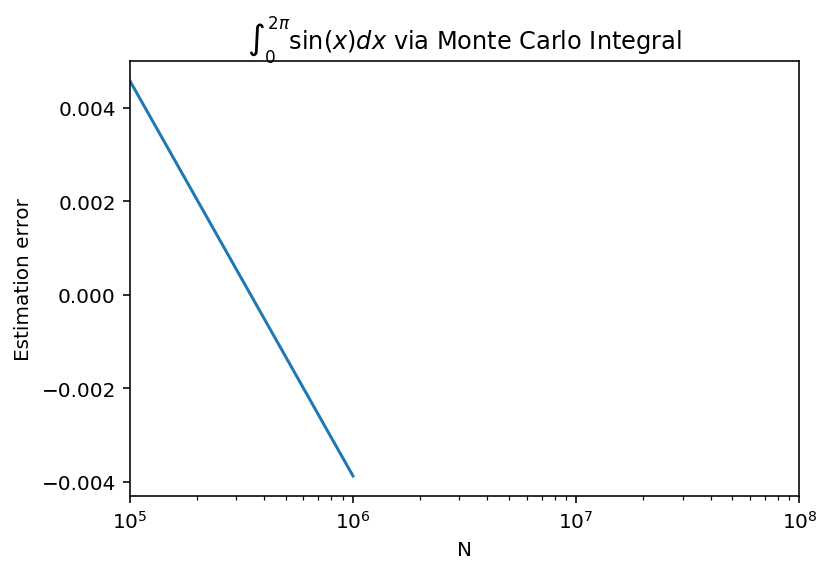

In [6]:
Ns = [10**i for i in range(5,7)]
Is = [estimate_integral(np.sin, 0, 2*np.pi, n) for n in Ns]
plt.semilogx(Ns,Is)
plt.title(r"$\int_0^{2\pi}\sin(x)dx$ via Monte Carlo Integral")
plt.xlabel("N")
plt.ylabel("Estimation error")
plt.xlim(10**5,10**8)
plt.show()

It does in fact converge eventually. Though this method is vastly less efficient than the trapezoid rule we have been using deterministically in 1D, it turns out that for higher dimensional integrals (like 10D) this stochastic technique can substantially outperform similar deterministic strategies.

## Random Walks

Where Monte Carlo methods really shine is in approximating behavior that is common in thermodynamics. For example, the air molecules in a room collide with each other constantly, effective jostling each other into random bits of short motion between collisions. Similarly, the molecules in a solid like a table vibrate and randomly exchange packets of energy as they essentially bump into each other - these packets of energy flow through the solid in the form of heat.

If we don't care much about the details of the motion, but want to capture the overall effects of the random jostling, we can simulate random walks of particles.

As a simple example, the following code places 100 particles at the origin of a 2D plane, then has them randomly walk around by taking integer steps in one of the four cardinal directions (E, W, N, S). The resulting animation shows their motion over time.

In [7]:
g = rw.walk_gen(walkers=100)

In [8]:
rw.plot_anim(g, xlim=(-50,50), ylim=(-50,50), max_frames=200)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAGefG1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTQ4IHIyNjQzIDVjNjU3MDQgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE1IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9NiBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAAW0ZYiE
ADP//vbsvgU1/Z/QlxEsxdpKcD4qpICAdzTAAAADAAB4HShe6DhKq9DAABvIzcIk3f+ABLO++E67
pBhendidMhig5WmV6h73lqDj7Mh1OsrP9f35GBGKX23n8bzqT7oTWwNaVDGHQZS1Tk42Zt8BMtTD
twpUXrXmNVJNC2SyLhfqlPF65cdQsGzFpMNaBJESVb8QxBvWgQUMZbvilb+VYoQUbuQlR0ET/4rY
TY9eXMjCwRyIVgg6Sj6hr7uNdBumu2p7hDRQAEnUEDh87papwAmwgxaOFP1Hx1s/P4JY1Mn2//A0
soxfSsfTj9lXwG4TxtIKw8Dfd0WKLHQUDzDpLJIBgNnDim7CXJ57bCMV0vhmAnRD7r5PpQp+PbhK
2w67nflvWH6oVE8n6ghcpm9FjRt8pG8iYECzH5vrFEXWLOJ1XsaBxwJZNrxZr4nyXBHl+1Z2PqW+
8pyb9xHsXeqKkS0in8HcWlTDSNvshwhe4zMM7OxcFzn9nX77iVQ/nB4KblpSpLDUdvsl/fDEVwGP
w2iB0Gh3kYtMo0wncQGP+y2WJfCwHTSMXpyPkU+M3z9WCxmzYkkzvD9NdgpSqTqMbxNEWff297cj
yBe9MlOxBplWtea0AxT1lP19D4rv1xFioxDJu+Ohe3kmTwcO7FOkwL/7wA28EWg2+G1/ksEfgoT7
7zz0x8O457xw0Kx6Y/aNQgzo5T7suCKs5MCrI/OKnbXqauVzjq3+Ul2V1nuL24bqTwPvH0wzbUmi
yeKXcpngLIdctkManxW9V6okLJrXSXUrhgMpkl6+oES1e6Zb5ySemWvfYaf5a2lA49nQJxLGllKe
BZyND8HB701ZN0ybj2y564D7Sm0+3+jz66xmipqsbGaWWOivNwmIvFy85T9h5tSTxfnfIt8bkVbN
IAELAAQIVBkj06bjZ75L6CDR+2xk/+hbe5pF2Ysp7Zw7ZgBEhDQjDN1ohFRN3Gs8AU93tQN9ySmZ
7O18my2qHhDoqOStvCBYN51y/Bs0L38EL9HOPXP79/I14bTh3VOAbr5aX2DefWAj4mXscUJb34iE
D4OVtaNieE73CDBpdH/Fzpe8UXng1TWoKsUvEaE+ETNt0b9BpRc0zI/TgBWApmSm5em56eovKlJt
0sw/Tqkpm55sMhvTtiM2VHHZM6HAER4ox9YjwP/4eQ+pimx+Sl4FCVYoDX0QY06pTkcB5kBh98ZW
gVLHJ4FV9USGbcPnC/J8YsNxmdF4vF6mgc3ditaKR6jVJHK/Vn6cEPZLx2LjVn6elinZnwxbcUWe
u374FRxSYXVUPHlbUF8victgVI490s2V9aV8I3yZVBnQWFk4GESdwXCpmpHz3K0eNaTzQOaZGH3O
n33CCt6dbZysolFnO9aJHweuoYuBa1gym7aac5IiDsy+lSfpu3Scm0j0xhk0MsaRyn+YdE8WS5IF
dTSxuM8VKYZVksTRKzN9fU60Lx/WLQR5tAQqqgnwoWIYuYEAHhjoDVrL1vUxpd0CCPSB2jBnsJv0
d6FoPZV3t1UDANRINI9YMXtnNaXfaK4YnzIuNU5e32P95o8XV9ZLc7kD70PyDJzApt3+1PoM0Mrc
nuh3d4qA7QZhNp846TrcJioNMgIjtui0r3KW/WU1H9uHdDwpTQIWR+/xeDRsXUY0wsgJCbtpC8kx
KIlpuc8I8hMHxlhfloCbz7l4mhd/r0ov/fIz5tNndPBKLhtIvLU1Url8/RSKTIsaV094DR+HOQPO
Ce5sXRmnpJYvrg2Sye1Xw4X0MPoJ/XC+o7wYZ7ESGH0+rIVZv7pcwEFiGOvHUKmT7cD+nO5q1fvi
9rIqIMrlWkeFw55EIvcxSvvQ8iIBNPflBTbnxKeYW8i0cMoFHdKV/gmsm0AqEbL9QcnEw8+X++lx
cd5LQtpZyu6jUav8UYsZ7xoN74NH7JAIEANBqAm83FEAAAFOQZokbEM//p4QZ2x3OmV6XqrCBaAT
DKat8wpK/Ptd/KUnqXPtildxx3TROBlPaa2s/ZqYUjKD5pF5VE73h4L+ydP1ZiGqmdN2i+fbVMvF
rpxn68vDHR7seCj2D9ormXDoPE43vKkmzlcVE5zRo9Y4CithxYRQb5Z+DcFo8/5UqQHeST0GruFn
mnDO8lZHK69KLDqeBZm+Bwk/wmO1nEhGlcsJ/oP1woohAapCWiJ8BBNSOMf5vie/OVVDRxgqzP/7
i6zwQet3599NMAqRIprovk94mL0Xn6kALihJCyEOjMRjVWHDvwx5tjaQguAoQyNCDlnpg10KheXr
S6aSoY0hW9imqBt2kZ7HXADYTjsFFF5TYrlfj3QRJkZ4XdeBRCctRq1kr68QEU6ICY/6F8NvTkBp
kDCHepHUdkkl41jEBfkMME5c2PnMAiptenbdkAAAAJBBnkJ4hH8EfdddaltupEr5C1h4vgvM2DGY
cUisDTpYBG9qHc8wycg88wf60m8xmx72IFTrqlUBktPedWLoOdkeQIAP3M36s37TX1ymAkkeQYLW
QnzcLbrOdL3r3Bnq5tnoINuFnq6rCqfUiPp9A3Wjd5w+QstIfTNf2JON2Q2eOUxz3IS21PwyyfR1
ZoIVesEAAABHAZ5hdEf/B+vMQeRaLy/7AAADAABtEnaplg8FRaOkIa17tcACAhNZ16SdvJ9wmC+A
zKJYy5xQ2v8g7MekLZOYA4B2xXnRskAAAABhAZ5jakf/B+27qsCv60N6bCQAAAMAUQlMsIEuGmN1
nbYAQpzAjj63zTyrP4syvY0w6X5ZEKH7h4m25cKNxs9XGH/CqT2yPAIPbZ0ONkgzw9I5Pb0u5IYN
PqhcOnoSt2DjUwAAARZBmmhJqEFomUwIZ//+nhB/4sc8wwfKE0y0yEBZJ5zgAAJfjaLSPpbE9+22
9pFmk2BT087B8PvwAfpym

## Exercise

Create a new random walk generator that prevents the particles from passing through a box with walls at $x=-20,20$ and $y=-20,20$.  To make things interesting, place a hole in your box at $x=20$ for the range $y\in[-4,4]$ such that particles can wander freely in that region of the hole as before.  Make sure particles outside the box and inside the box cannot move through the box walls, but otherwise move freely.  Modify the animation function so that the initialization frame draws the boundaries of your box in addition to the particles.

In [9]:
g2 = rw.new_walk_gen(walkers=100)

In [10]:
rw.new_plot_anim(g2, xlim=(-50,50), ylim=(-50,50), max_frames=200)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()